<a href="https://colab.research.google.com/github/nileshmalode11/Python_Mini_projects/blob/main/EDA_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Breakdown of this notebook:**

1.**Loading the dataset**: Load the data and import the libraries.

2.**Data Cleaning**:

Deleting redundant columns.

Renaming the columns.

Dropping duplicates.

Cleaning individual columns.

Remove the NaN values from the dataset



3.**Data Visualization**: Using plots to find relations between the features.

Restaurants delivering Online or not

Restaurants allowing table booking or not

Table booking Rate vs Rate

Best Location

Relation between Location and Rating

Restaurant Type

Gaussian Rest type and Rating

Types of Services

Relation between Type and Rating

Cost of Restuarant

No. of restaurants in a Location

Restaurant type

Most famous restaurant chains in Bengaluru

In [ ]:
# importing requred libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

1.**Loading the dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/zomato.csv.zip")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
## There 51717 rows and 17 columns in our database
df.shape

(51717, 17)

2**Data Cleaning**

In [ ]:
#Deleting Unnnecessary Columns
new_df=df.drop(['url','dish_liked','phone'],axis=1)
new_df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
x=new_df['cuisines'].unique()
x

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [ ]:
#Removing the Duplicates
new_df.duplicated().sum()
new_df.drop_duplicates(inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51674 non-null  object
 1   name                         51674 non-null  object
 2   online_order                 51674 non-null  object
 3   book_table                   51674 non-null  object
 4   rate                         43907 non-null  object
 5   votes                        51674 non-null  int64 
 6   location                     51653 non-null  object
 7   rest_type                    51447 non-null  object
 8   cuisines                     51629 non-null  object
 9   approx_cost(for two people)  51329 non-null  object
 10  reviews_list                 51674 non-null  object
 11  menu_item                    51674 non-null  object
 12  listed_in(type)              51674 non-null  object
 13  listed_in(city)              51

In [ ]:
#Remove the NaN values from the dataset
new_df.isnull().sum()
new_df.dropna(how='any',inplace=True)
new_df.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [ ]:
new_df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
new_df = new_df.rename(columns={"approx_cost(for two people)":"cost","listed_in(type)":"type","listed_in(city)":"city"})
new_df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [ ]:
new_df.describe()

,votes
count,43499.000000
mean,334.427435
std,864.661517
min,0.000000
25%,17.000000
50%,64.000000
75%,255.000000
max,16832.000000


In [ ]:
#Some Transformations
new_df['cost'] = new_df['cost'].astype(str) #Changing the cost to string
new_df['cost'] = new_df['cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost
new_df['cost'] = new_df['cost'].astype(float) # Changing the cost to int
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [ ]:
#Reading Rate of dataset
new_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
#Removing '/5' from Rates
new_df = new_df.loc[new_df.rate != 'NEW']
new_df = new_df.loc[new_df.rate != '-'].reset_index(drop=True)
remove_slash = lambda x : x.replace('/5','') if type(x) == str else x
new_df.rate = new_df.rate.apply(remove_slash).astype('float')
new_df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [ ]:
# Adjust the column names
new_df.online_order.replace(('Yes','No'),(True, False),inplace=True)
new_df.book_table.replace(('Yes','No'),(True, False),inplace=True)
new_df.cost.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
       1700., 1350., 2200., 1400., 2000., 1800., 1900.,  180.,  330.,
       2500., 2100., 3000., 2800., 3400.,   50.,   40., 1250., 3500.,
       4000., 2400., 2600., 1450.,   70., 3200.,  240., 6000., 1050.,
       2300., 4100.,  120., 5000., 3700., 1650., 2700., 4500.,   80.])

In [ ]:
new_df.nlargest(5,'cost')

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
15115,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature - The Leela Palace,False,True,4.3,126,Old Airport Road,Fine Dining,"French, Italian",6000.0,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Indiranagar
36373,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature - The Leela Palace,False,True,4.3,128,Old Airport Road,Fine Dining,"French, Italian",6000.0,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Old Airport Road
32058,"ITC Windsor, 25 Windsor Square, Sankey Road, B...",Royal Afghan - ITC Windsor,False,True,4.3,413,Sankey Road,Fine Dining,"North Indian, Mughlai",5000.0,"[('Rated 5.0', 'RATED\n It is just Bukhara wi...",[],Dine-out,Malleshwaram
33115,"Radisson Blu, 90/4, Outer Ring Road, Munnekoll...",Malties - Radisson Blu,False,False,4.3,53,Marathahalli,Lounge,"Continental, Fast Food",4500.0,"[('Rated 3.0', ""RATED\n We had visited this p...",[],Dine-out,Marathahalli
33530,"Radisson Blu, 90/4, Outer Ring Road, Munnekoll...",Malties - Radisson Blu,False,False,4.3,53,Marathahalli,Lounge,"Continental, Fast Food",4500.0,"[('Rated 3.0', ""RATED\n We had visited this p...",[],Drinks & nightlife,Marathahalli


In [ ]:
#Encode the input Variables
def Encode(new_df):
    for column in new_df.columns[~new_df.columns.isin(['rate', 'cost', 'votes'])]:
        new_df[column] = new_df[column].factorize()[0]
    return new_df

up_df = Encode(new_df.copy())

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

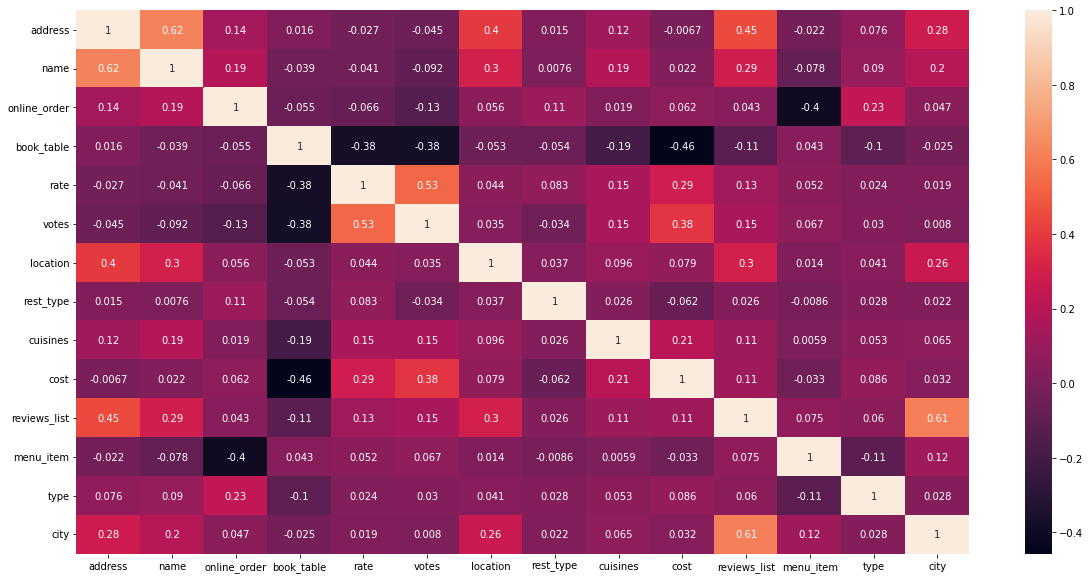

In [ ]:
#Get Correlation between different variables
corr = up_df.corr(method='kendall')
plt.figure(figsize=(20,10))
sb.heatmap(corr, annot=True)
plt.savefig("correlation.png")
up_df.columns

The highest correlation is between name and address which is 0.63 which is not of very much concern


In [ ]:
#Defining the independent variables and dependent variables
x = up_df.iloc[:,[2,3,5,6,7,8,9,11]]
y = up_df['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()


16950    3.9
767      3.7
6750     4.0
9471     3.8
25162    3.7
Name: rate, dtype: float64

**3.** **Data Visualization**

**Restaurants delivering Online or not**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


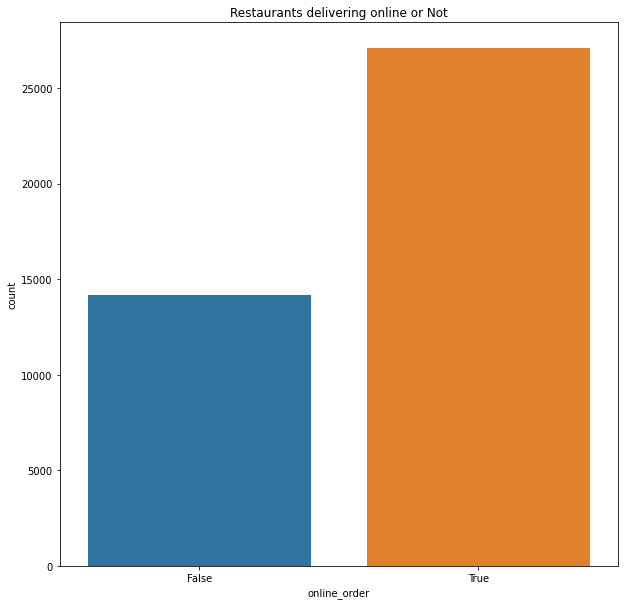

In [ ]:
#Restaurants delivering Online or not
sns.countplot(new_df['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')
plt.savefig("online.png")

**Restaurants allowing table booking or not**


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restaurants allowing table booking or not')

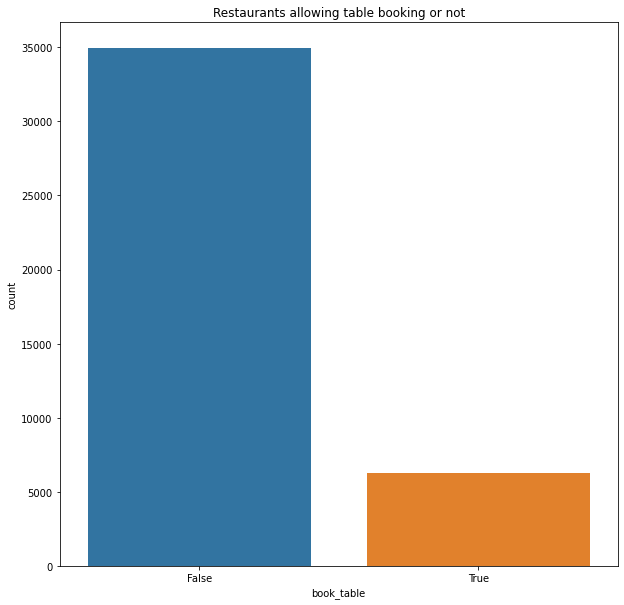

In [ ]:
sns.countplot(new_df['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.savefig("Book_Table.png")
plt.title('Restaurants allowing table booking or not')

**Table booking Rate vs Rate**

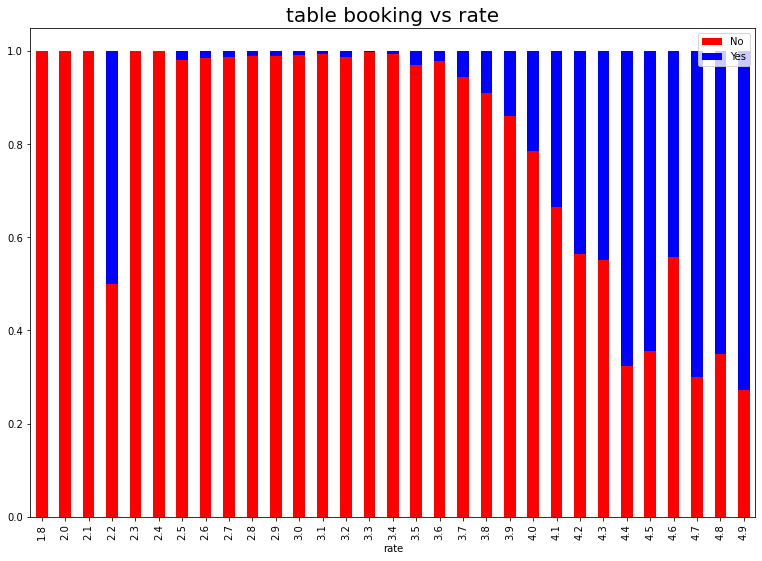

In [ ]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(new_df['rate'], new_df['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','blue'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.savefig("Table_Booking_Rate.png")
plt.show()

**Location**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Location')

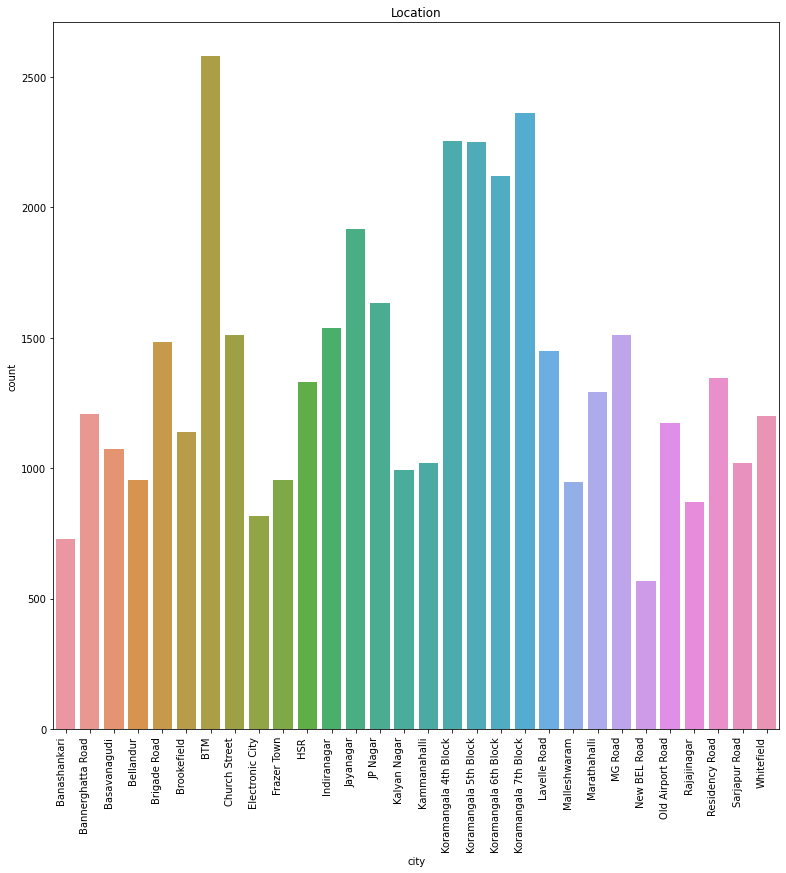

In [ ]:
sns.countplot(new_df['city'])
sns.countplot(new_df['city']).set_xticklabels(sns.countplot(new_df['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.savefig("Location.png")
plt.title('Location')


**most popular cusines**

(-1.1075843227656683,
 1.1003611593754798,
 -1.1026228032265373,
 1.121217975899736)

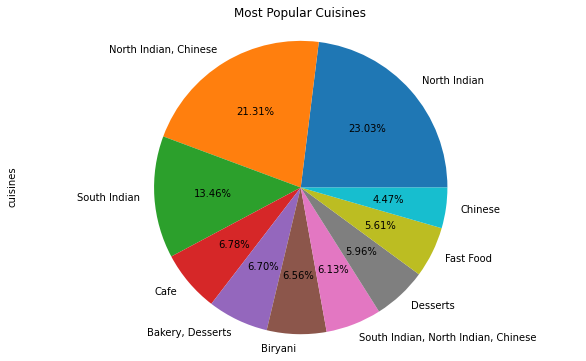

In [ ]:
#Top 10 Cuisines served by restaurants
new_df['cuisines'].value_counts().sort_values(ascending=False).head(10)
new_df['cuisines'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',figsize=(10,6), 
title="Most Popular Cuisines", autopct='%1.2f%%')
plt.axis('equal')



*  #### From the above graph, we can clearly see that 'North Indian' cuisine is the most popular cuisine and it makes sense as well since the maximum data has restaurants listed from banglore city.



**Location and Rating**

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
a=new_df.groupby('city')['rate'].mean().reset_index().sort_values(by='rate',ascending=False)
print(a.head())

              city      rate
7    Church Street  3.803770
5     Brigade Road  3.801146
21         MG Road  3.799868
27  Residency Road  3.779182
20    Lavelle Road  3.774948


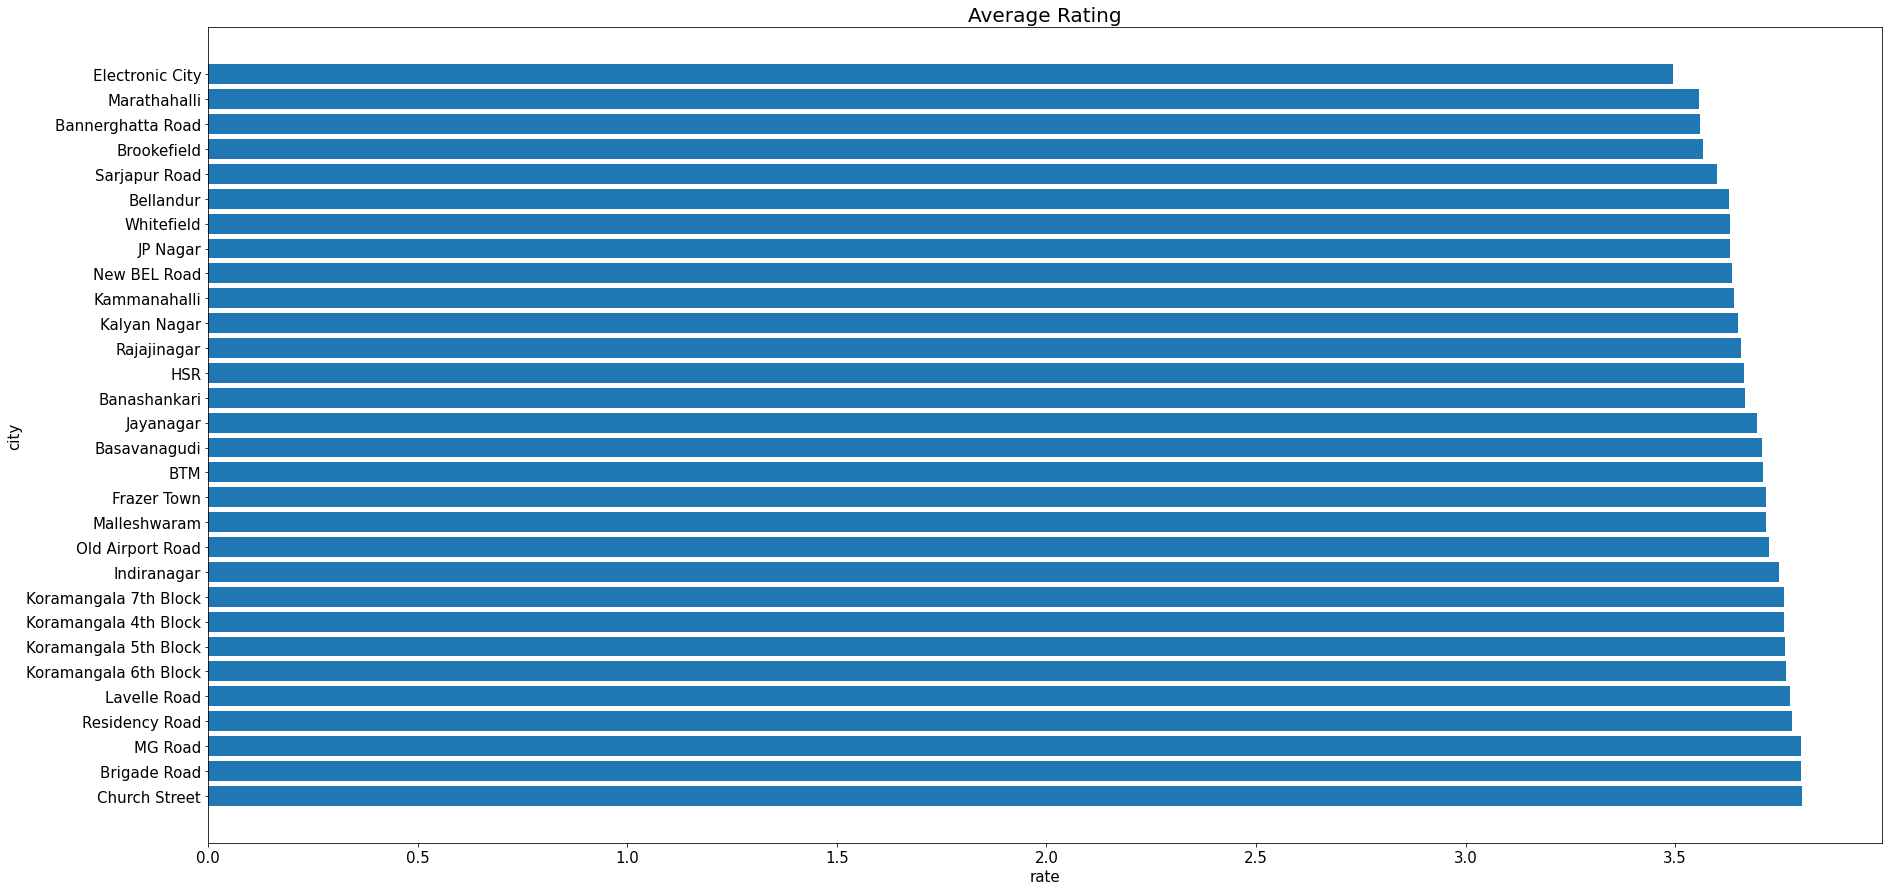

In [ ]:
plt.figure(figsize=(30,15))
plt.barh(a.city,a.rate)
plt.xlabel('rate',size=15)
plt.ylabel('city',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Average Rating',size=20)
plt.savefig(r'rating.png')





*  High-rated restaurants are most commonly found in Church Street, Brigade Road, and MG Road, while Electronic City has the lowest number of high-rated restaurants.





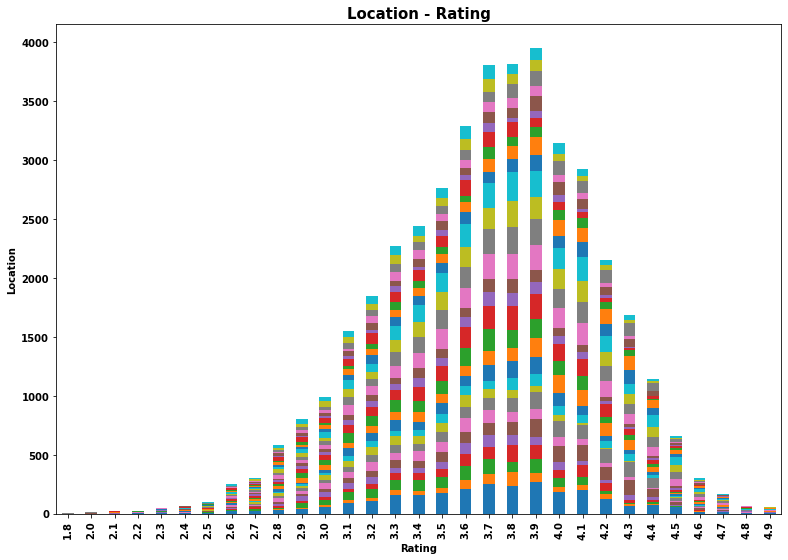

In [ ]:
loc_plt=pd.crosstab(new_df['rate'],new_df['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();
plt.savefig("Location Rating.png")

**Restaurant Type**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restuarant Type')

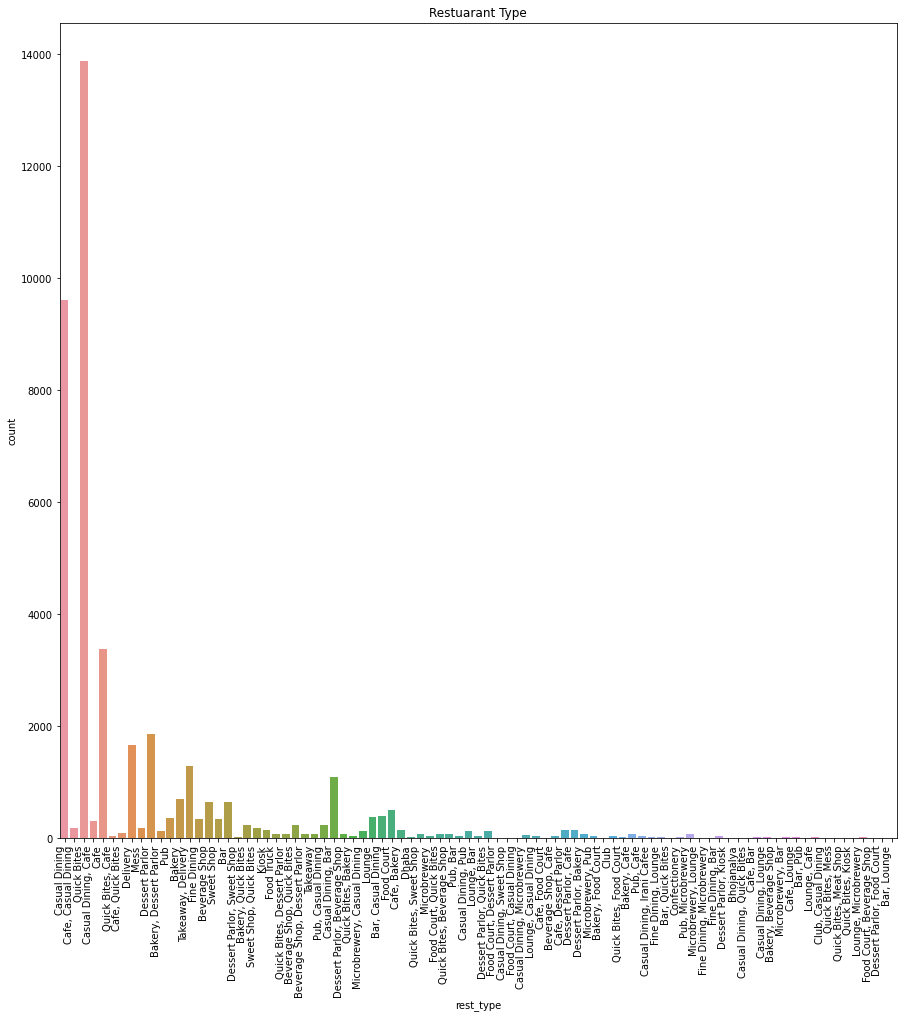

In [ ]:
sns.countplot(new_df['rest_type'])
sns.countplot(new_df['rest_type']).set_xticklabels(sns.countplot(new_df['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.savefig("Restuarant Type")
plt.title('Restuarant Type')

**Gaussian Rest type and Rating**

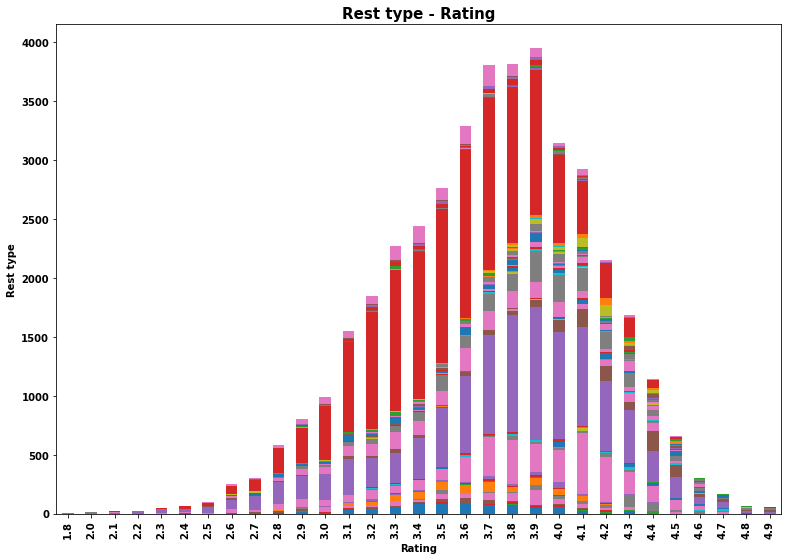

In [ ]:
loc_plt=pd.crosstab(new_df['rate'],new_df['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();
plt.savefig('Rest Type-Rating')

**Types of Services**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


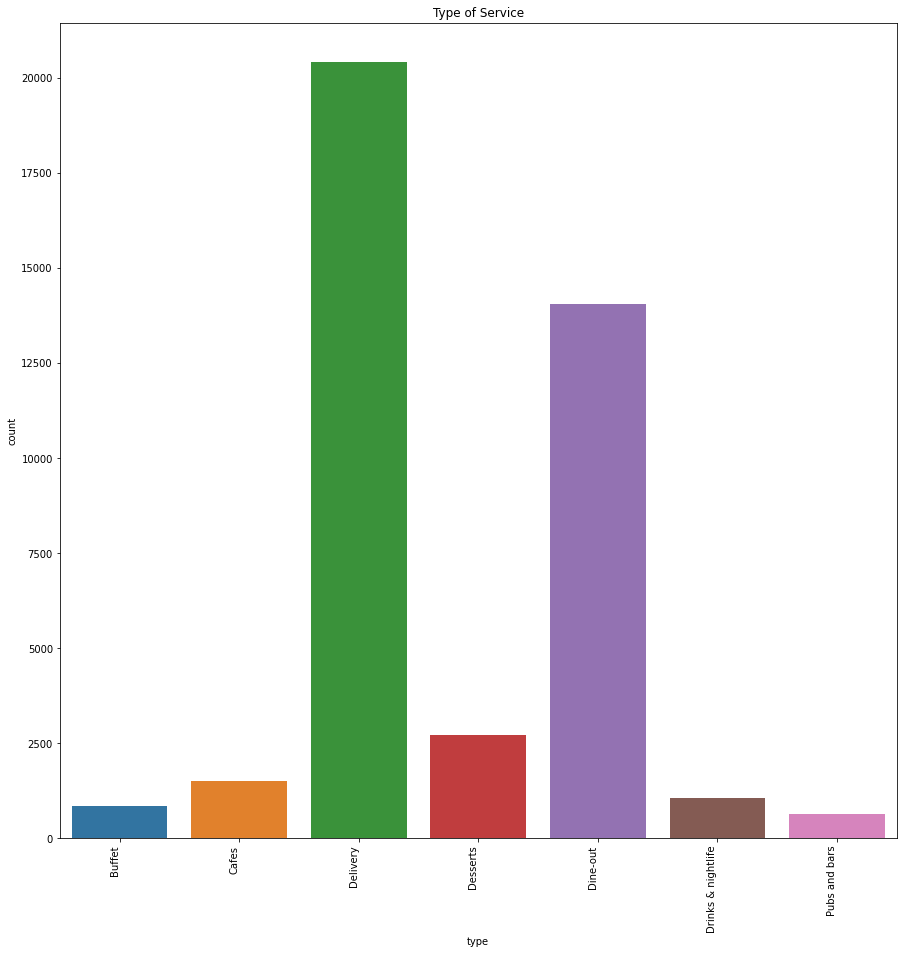

In [ ]:
sns.countplot(new_df['type'])
sns.countplot(new_df['type']).set_xticklabels(sns.countplot(new_df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')
plt.savefig('Types of Service')

**Type and Rating**

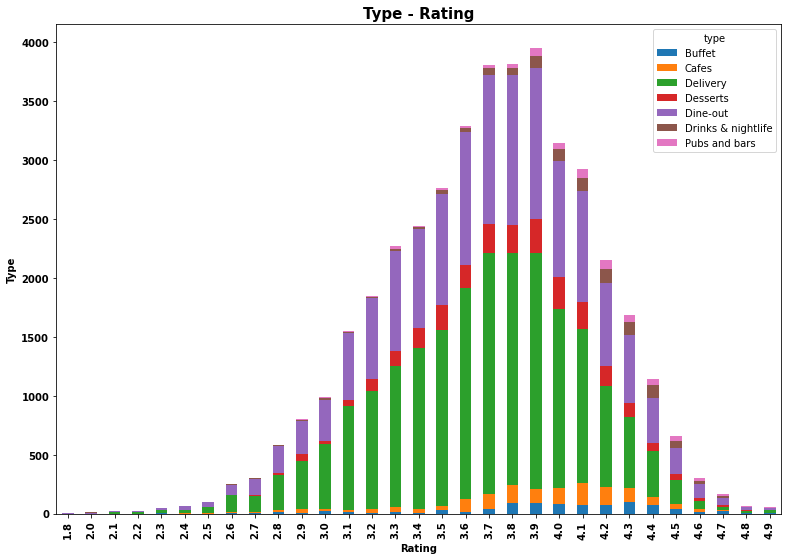

In [ ]:
type_plt=pd.crosstab(new_df['rate'],new_df['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.savefig('Type and Rating')

**Cost of Restuarant**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


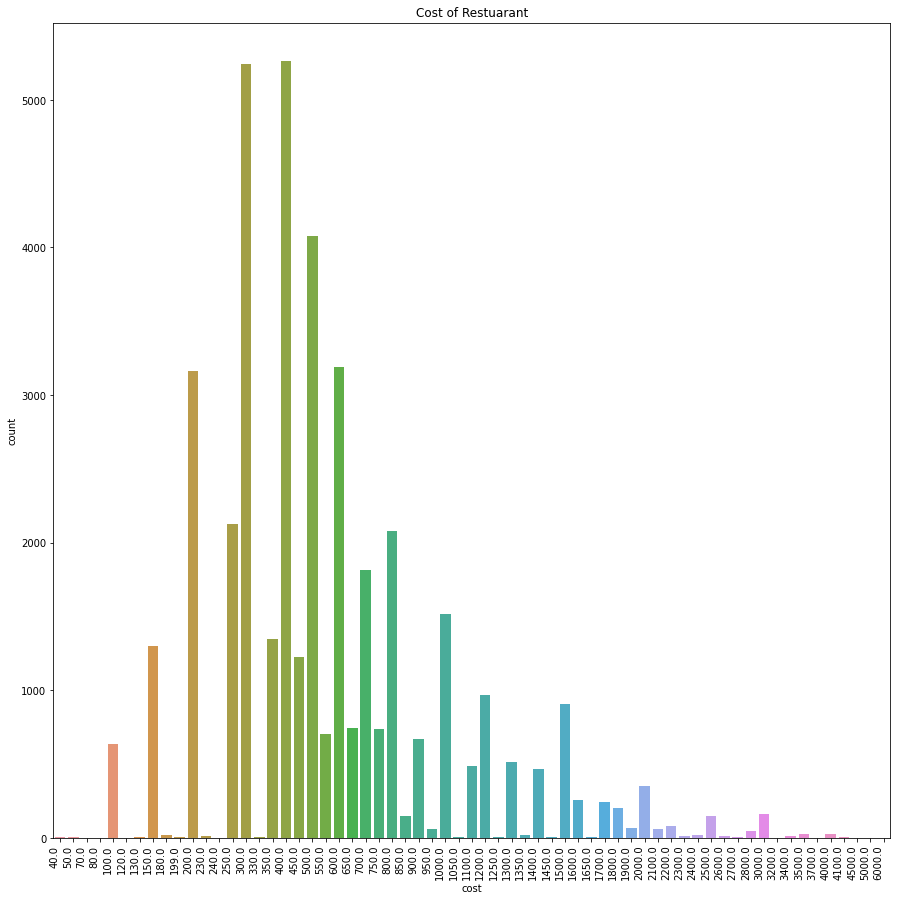

In [ ]:
sns.countplot(new_df['cost'])
sns.countplot(new_df['cost']).set_xticklabels(sns.countplot(new_df['cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')
plt.savefig('Cost of Restaurant')

**No. of Restaurants in a Location**

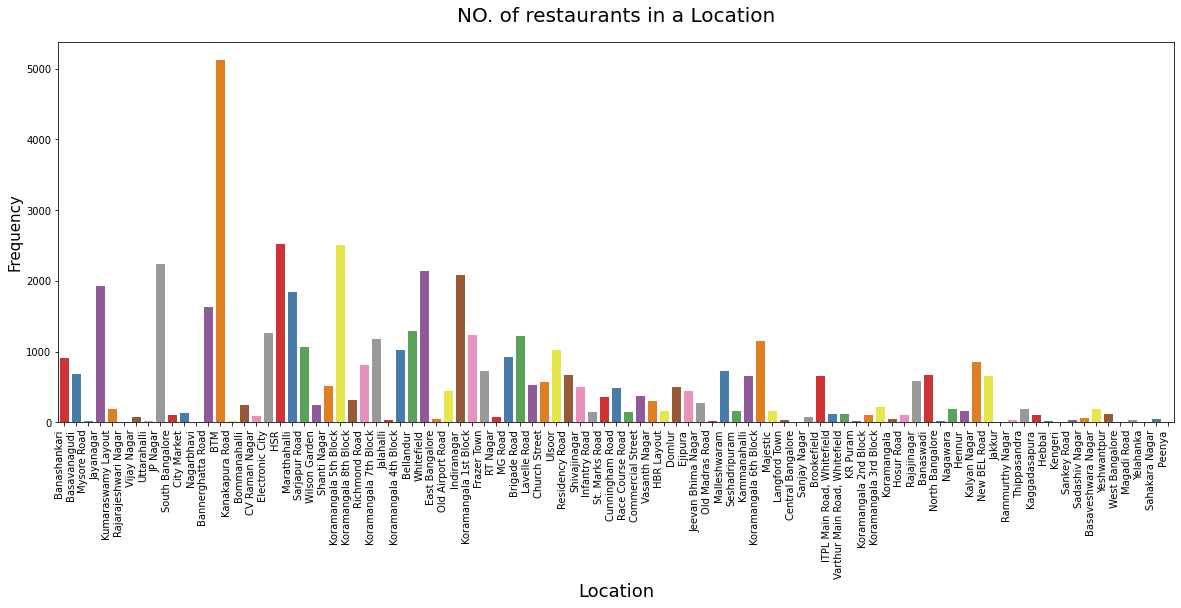

In [ ]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)
plt.savefig("Restaurants in Location")

**Restaurant type**

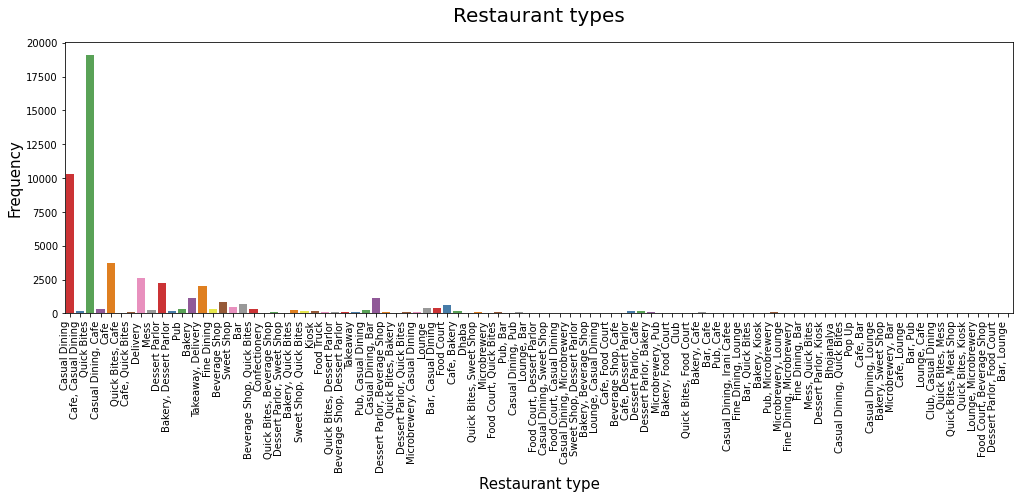

In [ ]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=df, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)
plt.savefig('Restaurant types')

In [ ]:
plt.figure(figsize=(30,10))
plt.barh(a.city,a.rate)
plt.xlabel('city',size=15)
plt.ylabel('rate',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Average Rating',size=20)
plt.savefig('cost rate.png')

NameError: ignored